# Исследование объявлений о продаже квартир

**Задача:**

Необходимо определить рыночную стоимость объектов недвижимости.

**Данные:**

По каждой квартире доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных.

### Изучение общей информации данных. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

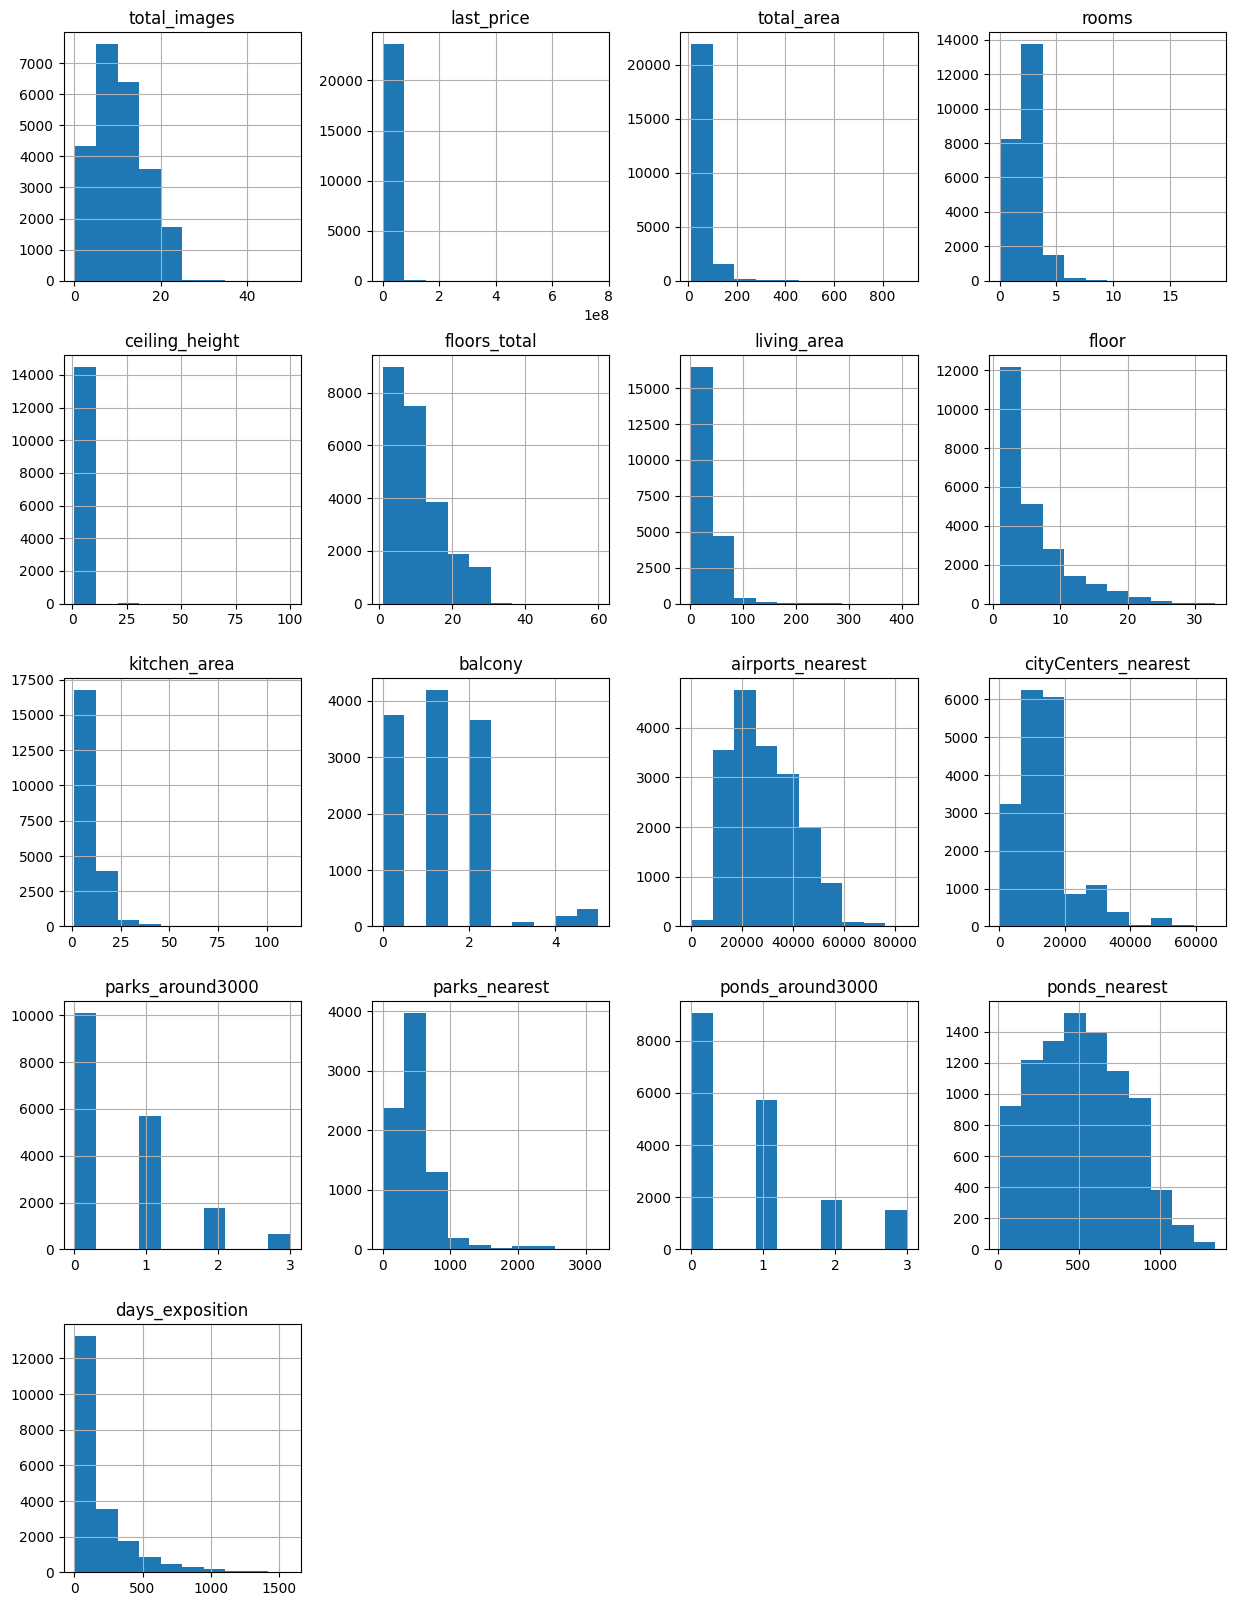

In [5]:
data.hist(figsize=(15,20));

*Описание данных*
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Предобработка данных

#### Работа с пропущенными значениями

Проверка данных на наличие пропусков.

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски присутствуют во многих столбцах.

В столбце `balcony` пропуски могут говорить о том, что скорее всего у квартиры отсутствуют балконы и продавец не указал об этом.

In [7]:
data['balcony'] = data['balcony'].fillna(0)

В столбце `is_apartment` может быть только два значения, апартаменты ли это или нет. Пропуски могут говорить о том, что данная квартира апартаментами не является и продавец об этом не указал.

In [8]:
data['is_apartment'] = data['is_apartment'].fillna(False)

В столбце `floors_total` пропуски могли быть допущены из-за невнимательности или сбоя записи. Тогда для подстановки предположим, что в объявлении указанный этаж считается последним этажом в доме.

In [9]:
data['floors_total'] = data['floors_total'].fillna(data['floor'])

В столбце `days_exposition` достаточно большое количество пропусков, но как то заполнить их не имеется возможным, так как кроме даты о публикации объявления, о временных данных об объявлениях больше ничего не известно.

В столбцах, описывающих жилую площадь, площадь кухни и высоту потолков (`living_area`, `kitchen_area`, `ceiling_height` соответственно) пропуски могут говорить о том, что данные измерения не были совершенны продавцом.

In [10]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [11]:
for value in data['total_area'].unique():
    data.loc[(data['total_area'] == value) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['total_area'] == value), 'living_area'].median()

In [12]:
data.groupby('total_area')['living_area'].mean()

total_area
12.0      10.0
13.0      10.0
13.2       NaN
14.0      11.0
15.0       NaN
         ...  
590.0    409.0
618.0    258.0
631.0      NaN
631.2    322.3
900.0    409.7
Name: living_area, Length: 2182, dtype: float64

In [13]:
for value in data['total_area'].unique():
    data.loc[(data['total_area'] == value) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['total_area'] == value), 'kitchen_area'].median()

In [14]:
data.groupby('total_area')['kitchen_area'].mean()

total_area
12.0       NaN
13.0       NaN
13.2       NaN
14.0       2.0
15.0       NaN
         ...  
590.0    100.0
618.0     70.0
631.0     60.0
631.2     19.5
900.0    112.0
Name: kitchen_area, Length: 2182, dtype: float64

В столбце `locality_name` незначительное количество пропусков, но оно и к лучшему, ведь на исследование это мало повлияет, а данных недостаточно, чтобы их заполнить. Возможно, пропуски могли возникнуть из-за невнимательности продавцов, а так же возможно часть данных потерялась при пересылке.

Столбцы, в которых содержится информация о расстоянии до ближайшего аэропорта и расстоянии до центра города (`airports_nearest`, `cityCenters_nearest` соответственно) может содержать пропуски по причине большой отдаленности. По причине недостатка данных для заполнения пропусков стоит их оставить незаполненными.

Со столбцами `parks_around3000` и `parks_nearest`, `ponds_around3000` и `ponds_nearest` обстоит схожая ситуация. Друг между другом они могут быть связаны, но с остальными данными как таковой взаимосвязи для заполнения пропусков нет. Поэтому эти столбцы также оставим с пропусками.

Проверим заполнение пропусков

In [15]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area               143
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              205
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Вывод:**
Большинство пропусков были вызваны тем, что скорее всего продавцы не записали ту информацию, которой в принципе у них и нет. Это не критично, такие пропуски легко заполняются и можно продолжать с ними работу.

#### Работа с типами данных

При помощи метода `info()` были получены типы данных, записанных в столбцах. На основе этого, для дальнейшего удобства исследования следует поменять тип данных в некоторых столбцах.

Тип данных в `first_day_exposition` заменим  на тип datetime, для удобства работы с временными данными. 

In [16]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Тип данных в `is_apartment` был типом object, скорее всего из-за присутствия в этом столбце пропусков. Теперь пропусков нет и для работы переведем данный столбец в тип bool.

In [17]:
data['is_apartment'] = data['is_apartment'].astype('bool')

Количество этажей, балконы и количество дней, сколько было размещено объявление - все это целочисленные данные. Не может быть 2 с половиной этажа или 3.9 балкона. Поэтому переведем эти строки в формат int.

In [18]:
list_to_int = ['floors_total', 'balcony']
for i in list_to_int:
    data[i] = data[i].astype('int')

Проверка типов данных в таблице

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23556 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23494 non-null  float64       
 13  balcony         

**Вывод:**
Просмотр и изменение типов данных в таблице является важной частью пред началом исследования. Ведь если столбец не будет соответствовать тому типу данных, который по логике и в замысле должен быть, то возможно искажение изучаемой информации.

#### Работа с дубликатами

Нахождение дубликатов в данных.

In [20]:
data.duplicated().sum()

0

Полные дубликаты в данных отсутствуют, необходимо проверить данные на содержание неявных дубликатов. 

В данных эти дубликаты могут присутствовать в столбце `locality_name`. Необходимо изучить столбец внимательнее.

In [21]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [22]:
print('Число уникальных значений до изучения столбца:',len(data['locality_name'].unique()))

Число уникальных значений до изучения столбца: 365


Сразу можно заметить, что из-за написания слово "поселок" с "е" или "ё", названий населенных пунктов больше. Для начала необходимо привести названия к единому написанию букв.

In [23]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

После можно убрать тип населенного пункта из названий населенных пунктов с помощью регулярного выражения, так как есть неявные дубликаты, например, "поселок Мурино" и "Мурино".

In [24]:
data['locality_name'] = data['locality_name'].str.replace(r'^(?:поселок |село |деревня |городской поселок |коттеджный поселок |садовое товарищество |городского типа | станции | имен и| при железнодорожной станции |садоводческое некоммерческое товарищество | городского типа | )', '', regex=True)

In [25]:
data['locality_name'] = data['locality_name'].str.replace(r'^(?:городского типа|при железнодорожной станции )', '', regex=True)

В итоге столбец с населенными пунктами будет выглядить чистым, красивым и без неявных дубликатов.

In [26]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', ' Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', ' Лебяжье', ' Сиверский', 'Молодцово',
       ' Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', ' Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', ' Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', ' Синявино', 'Тосно', 'Стрельна', 'Боксито

In [27]:
print('Число уникальных значений после изучения столбца:',len(data['locality_name'].unique()))

Число уникальных значений после изучения столбца: 319


**Вывод:**
Отсутствие дубликатов для данных - хорошо, но всегда могут поджидать неявные дубликаты, с ошибками в названии, другим написанием и т.д. Все необходимо проверять и заменят как можно тщательно для дальнейшей работы.

#### Работа с редкими и выбивающимися значениями

Проверка разных столбцов на наличие аномалий и выбросов.

Для начала сохраним длину таблицы, чтобы после работы с аномалиями проверить, сколько процентов данных являлись выбросами.

In [28]:
data_len_anomaly = len(data)
data_len_anomaly

23699

Лучше всего для работы по поиску выбросов подойдет график `boxplot`.

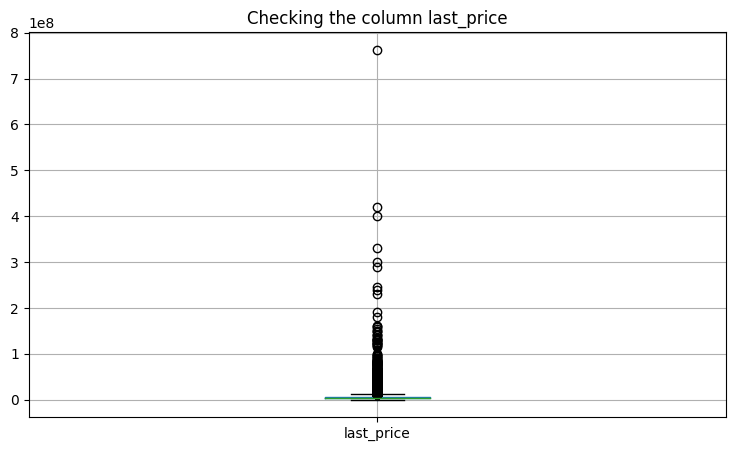

In [29]:
plt.figure(figsize=(9,5))
plt.title('Checking the column last_price')
data.boxplot(column='last_price');

Взглянув на boxplot данных в столбце `last_price` после отметки в 20.000.000 отмечаются обрывочные выбросы. Избавимся от них для дальнейшей работы.

In [30]:
data = data.query('last_price < 20000000')

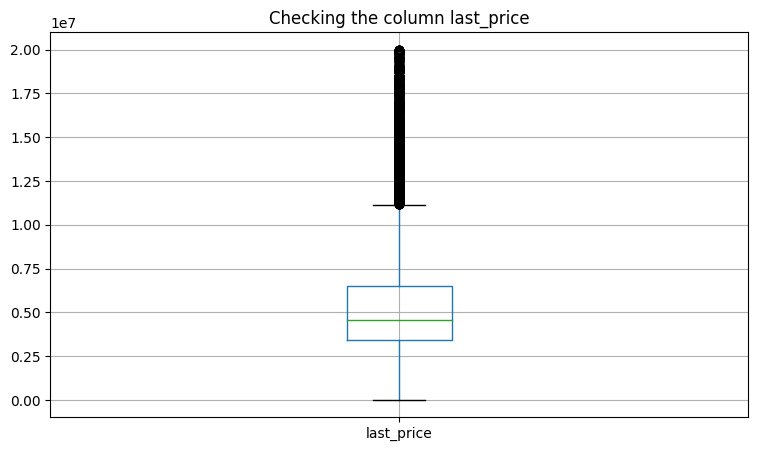

In [31]:
plt.figure(figsize=(9,5))
plt.title('Checking the column last_price')
data.boxplot(column='last_price');

В столбце `total_area` так же присутствуют обрывочные выбросы. Так же избавляемся от них. 

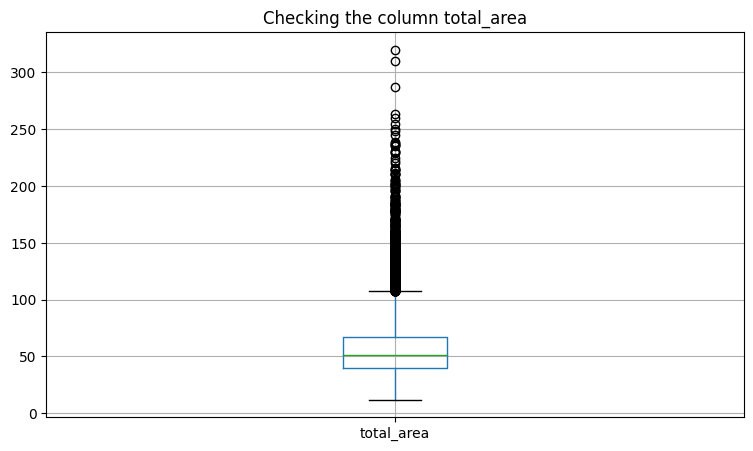

In [32]:
plt.figure(figsize=(9,5))
plt.title('Checking the column total_area')
data.boxplot(column = 'total_area');

In [33]:
data = data.query('total_area < 275')

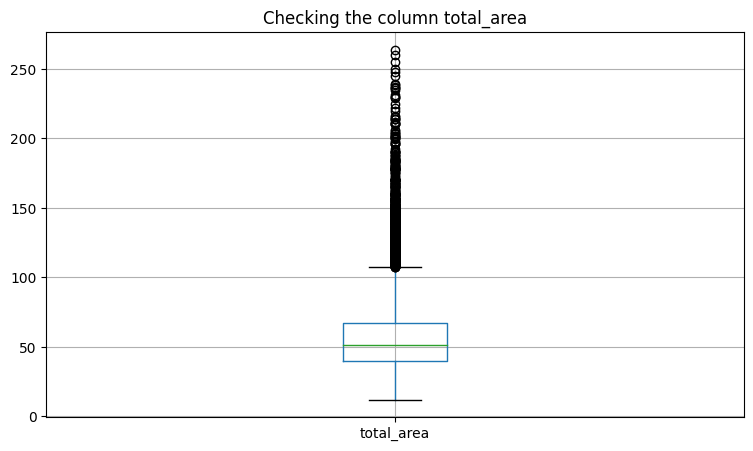

In [34]:
plt.figure(figsize=(9,5))
plt.title('Checking the column total_area')
data.boxplot(column = 'total_area');

В данных присутствуют объявления квартир с высотой потолка 100 метров. Выглядит как аномалия и нужно что то с этим сделать.

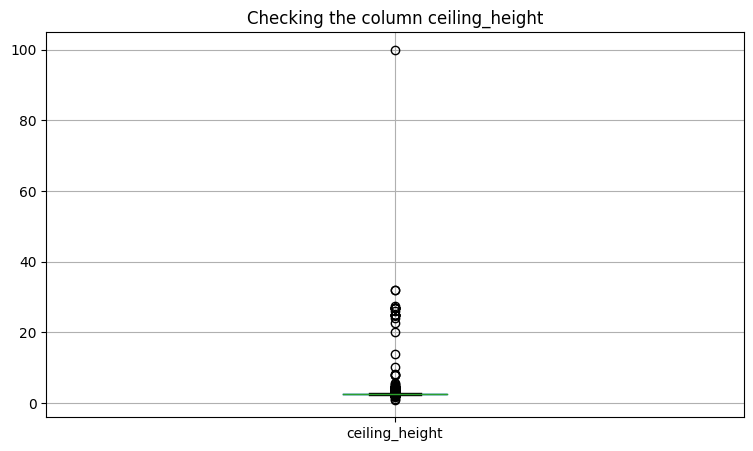

In [35]:
plt.figure(figsize=(9,5))
plt.title('Checking the column ceiling_height')
data.boxplot(column='ceiling_height');

Возможно, произошла ошибка при записи данных, ведь на boxplot можно заметить небольшой разрыв между выбросами. Из этого, можно предположить, что данные, которые больше 15 метров необходимо уменьшить в 10 раз.

In [36]:
data.loc[data['ceiling_height'] > 15, 'ceiling_height'] /=10

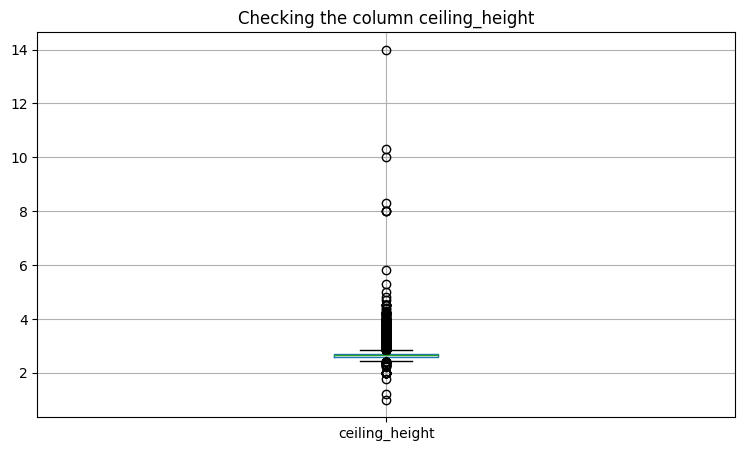

In [37]:
plt.figure(figsize=(9,5))
plt.title('Checking the column ceiling_height')
data.boxplot(column='ceiling_height');

Но все равно, потолки от 5 до 14 метров и меньше 2 метров кажутся чем то странным и уж сильно выходят за рамки графика. Уберем и их.

In [38]:
data = data.query('2 <= ceiling_height < 5')

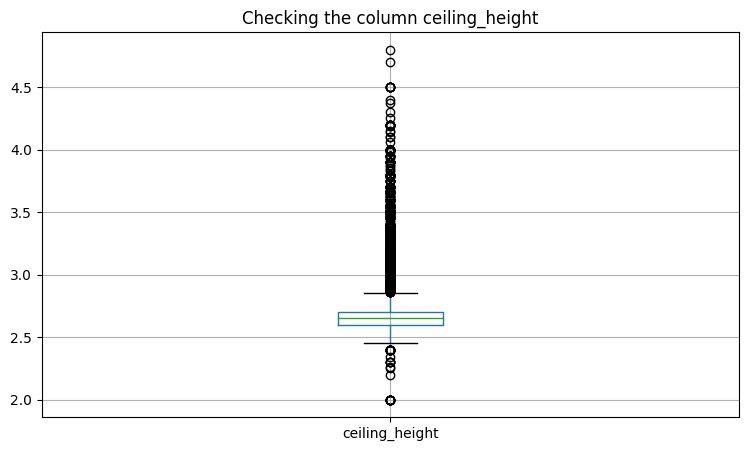

In [39]:
plt.figure(figsize=(9,5))
plt.title('Checking the column ceiling_height')
data.boxplot(column='ceiling_height');

В столбце `floors_total` легко прослеживаются выбросы. Избавимся от них.

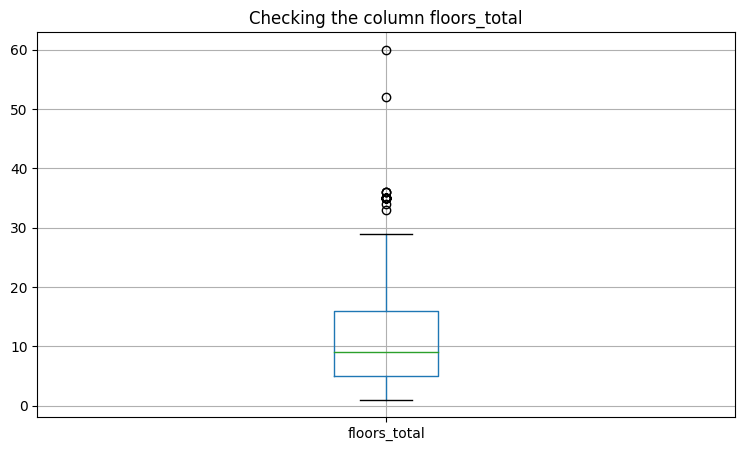

In [40]:
plt.figure(figsize=(9,5))
plt.title('Checking the column floors_total')
data.boxplot(column='floors_total');

In [41]:
data = data.query('floors_total < 30')

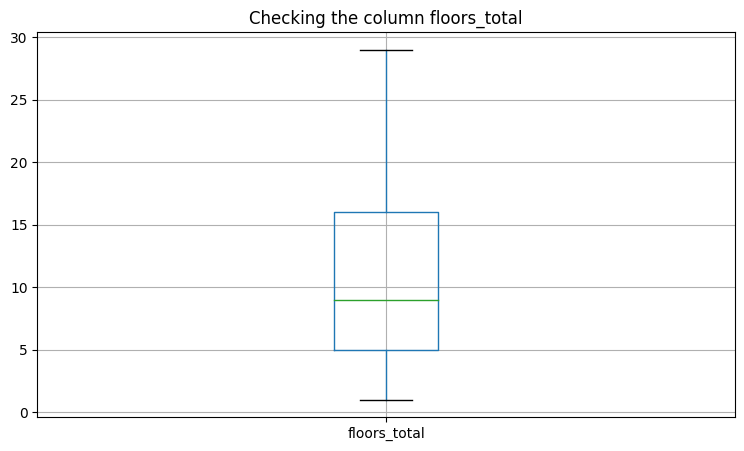

In [42]:
plt.figure(figsize=(9,5))
plt.title('Checking the column floors_total')
data.boxplot(column='floors_total');

Размер кухни в 55, а то и в 100 квадратных метров кажется чем то безумно необычным. Это объявления о квартирах, а не о ресторанах.

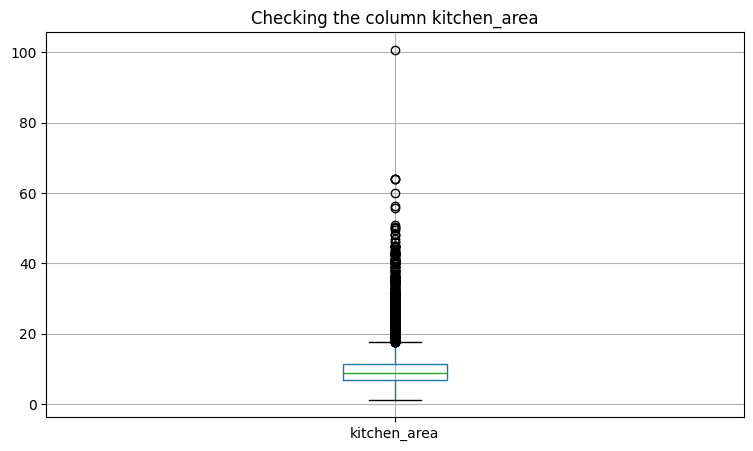

In [43]:
plt.figure(figsize=(9,5))
plt.title('Checking the column kitchen_area')
data.boxplot(column='kitchen_area');

In [44]:
data = data.query('kitchen_area < 55')

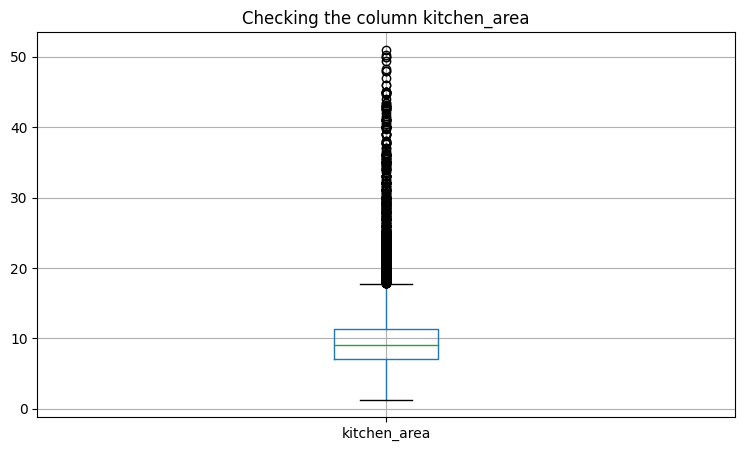

In [45]:
plt.figure(figsize=(9,5))
plt.title('Checking the column kitchen_area')
data.boxplot(column='kitchen_area');

После работы с выбросами посчитаем, сколько процентов занимали выбросы.

In [46]:
100 - (len(data)*100)/data_len_anomaly

4.059243006034009

**Вывод:**
В столбцах, в которых были обнаружены аномалии или огромные выбросы может объединить одно - безумно дорогие и огромные квартиры, если даже не дома или замки, которые могут помешать адекватным подсчетам, в виду малого количества.

### Расчет и добавление в таблицу новых столбцов

Новый столбец с информацией о цене одного квадратного метра.

In [47]:
data['price_one_sqare_meter'] = data['last_price'] / data['total_area']

Новый столбец с информацией о дне недели публикации объявления.

In [48]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

Новый столбец с информацией о месяце публикации объявления.

In [49]:
data['month_exposition'] = data['first_day_exposition'].dt.month

Новый столбец с информацией о годе публикации объявления.

In [50]:
data['year_exposition'] = data['first_day_exposition'].dt.year

Новый столбец с информацией о типе этажа квартиры.

In [51]:
def floor_type(row):
    floor = row['floor']
    total = row['floors_total']
    if  total == floor:
        return 'последний'
    elif floor == 1:
        return 'первый'
    else:
        return 'другой'
    
data['floor_type'] = data.apply(floor_type, axis=1)

Новый столбец с информацией о расстоянии до центра города в километрах.

In [52]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000,0)

**Вывод:**
Для дальнейших подсчетов и изучений данных были созданы новые столбцы.

### Исследовательский анализ данных

#### Изучение параметров объектов

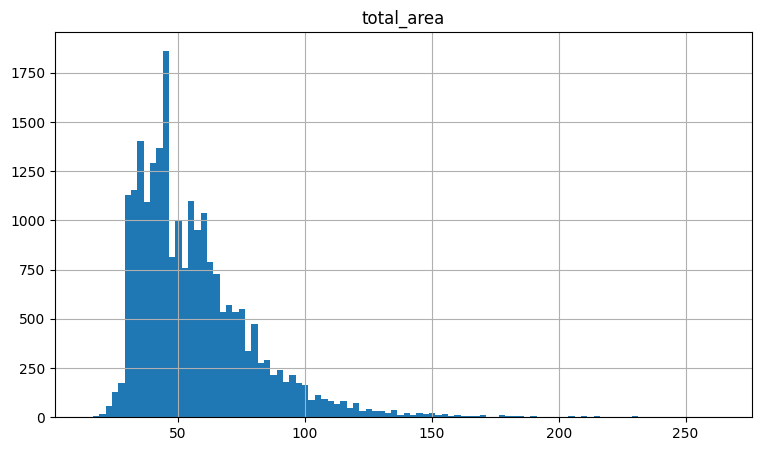

In [53]:
plt.figure(figsize=(9,5))
plt.title('total_area')
data['total_area'].hist(bins=100, figsize=(9,5));

Гистограмма показывает, что в большинстве объявлений общая площадь составляет примерно от 25 до 65 квадратных метров.

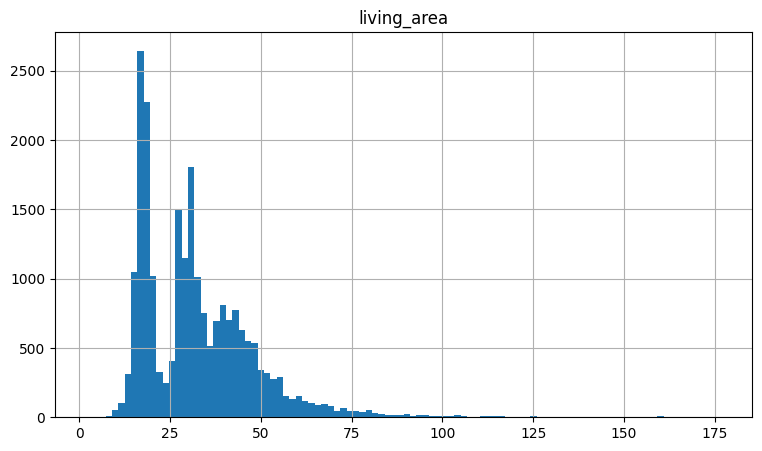

In [54]:
plt.figure(figsize=(9,5))
plt.title('living_area')
data['living_area'].hist(bins=100);

На данной гистограмме видно, что в подавляющем большинстве объявлений площадь жилой зоны составляет примерно 20-23 квадратных метров.

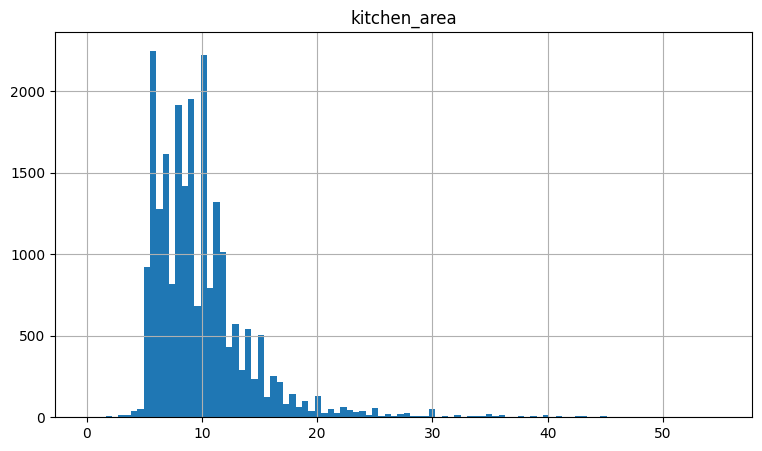

In [55]:
plt.figure(figsize=(9,5))
plt.title('kitchen_area')
data['kitchen_area'].hist(bins=100, range=(0,55));

Гистограмма показывает, что площадь кухонь совершенно разная. Но пик приходится на 5-12 квадратных метров.

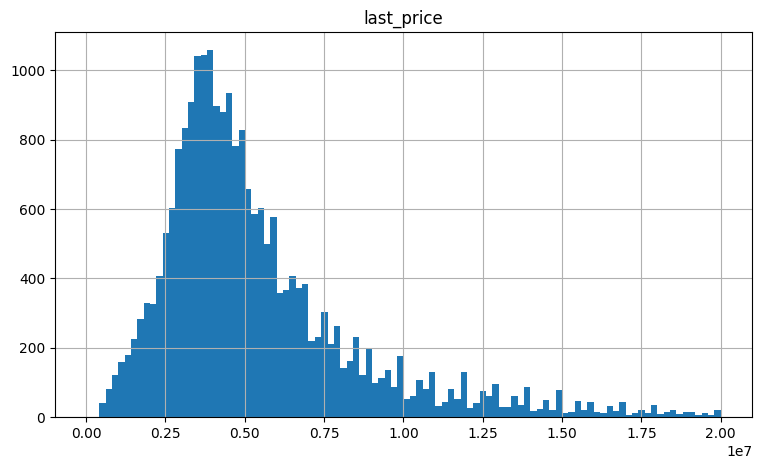

In [56]:
plt.figure(figsize=(9,5))
plt.title('last_price')
data['last_price'].hist(bins=100);

Больше всего квартиры выставляются в цену 3200000 - 3500000. В отличии от предыдущих, эта гистограмма больше всего выглядит на гистограмму с нормальным распределением, смещенную влево.

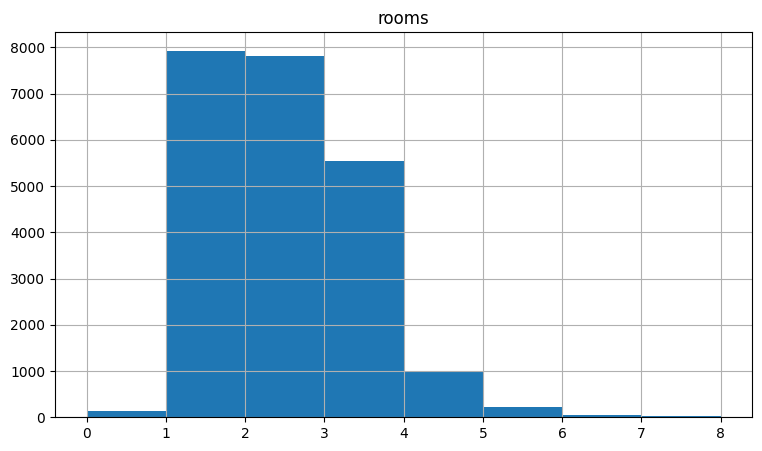

In [57]:
plt.figure(figsize=(9,5))
plt.title('rooms')
data['rooms'].hist(bins = 8, range=(0,8));

Больше всего на продажу выставлено квартир с одной, двумя и тремя комнатами.

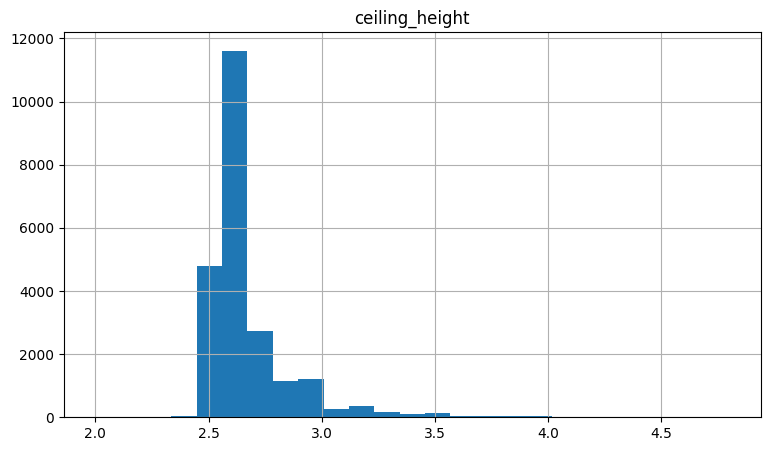

In [58]:
plt.figure(figsize=(9,5))
plt.title('ceiling_height')
data['ceiling_height'].hist(bins=25);

Самой распространенной высотой потолков являются потолки примерно 2,6 метра. 

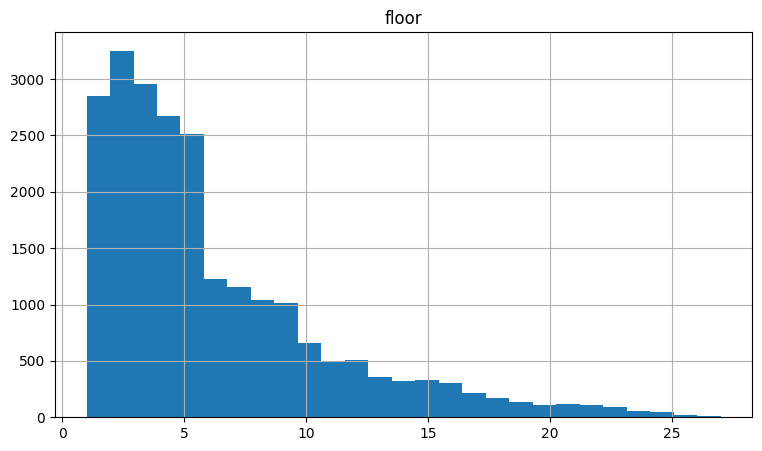

In [59]:
plt.figure(figsize=(9,5))
plt.title('floor')
data['floor'].hist(bins=27);

Больше всего выставлено на продажу квартир на 2 этаже, после 2 этажа с каждым этажом количество объявлений уменьшается.

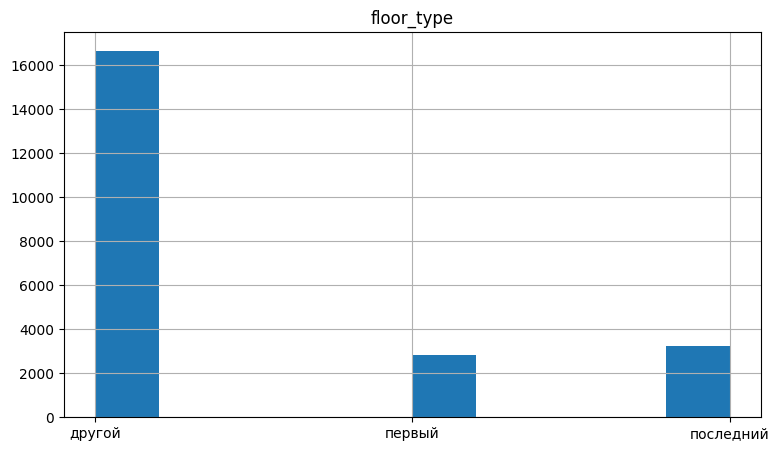

In [60]:
plt.figure(figsize=(9,5))
plt.title('floor_type')
data['floor_type'].hist();

Больше всего объявлений находиться ни на первом этаже ни на последнем, что логично.

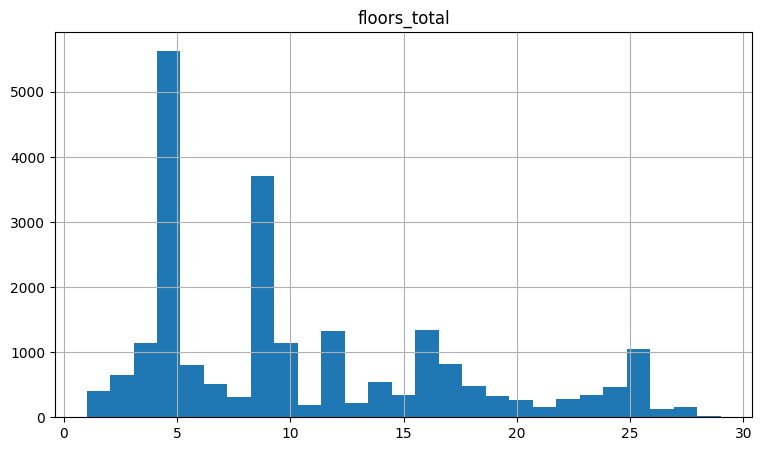

In [61]:
plt.figure(figsize=(9,5))
plt.title('floors_total')
data['floors_total'].hist(bins=27);

Больше всего объявлений в 5, 9 и 16 этажных домах.

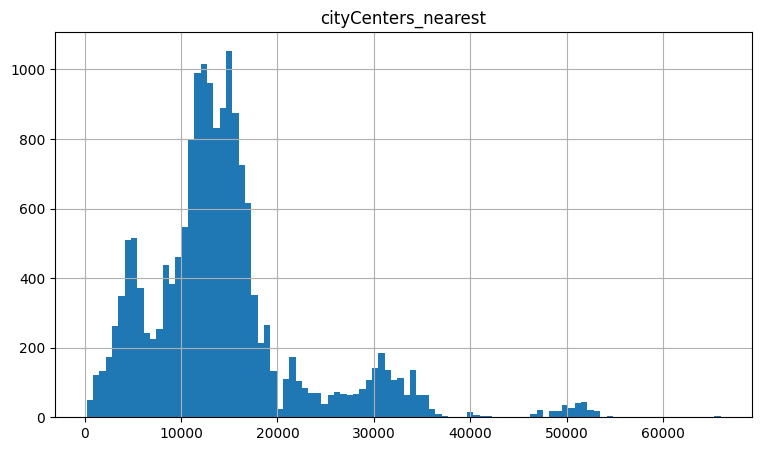

In [62]:
plt.figure(figsize=(9,5))
plt.title('cityCenters_nearest')
data['cityCenters_nearest'].hist(bins=100);

Не считая нулевых данных о расстоянии до центра города, большинство объявлений находится на расстоянии 10-17 километров от центра города.

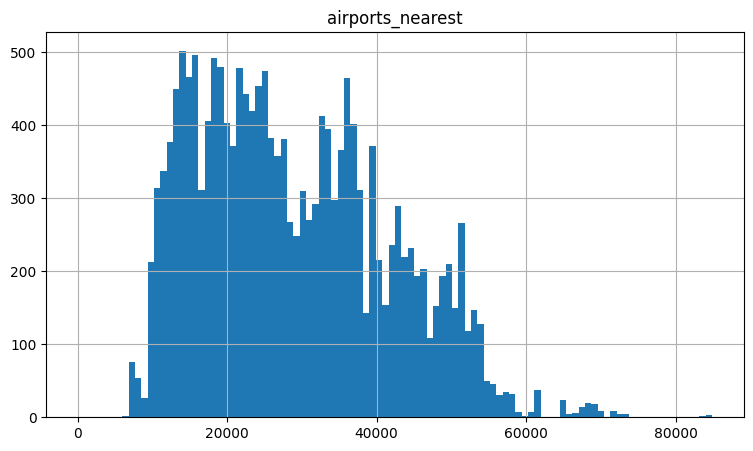

In [63]:
plt.figure(figsize=(9,5))
plt.title('airports_nearest')
data['airports_nearest'].hist(bins=100);

Не считая нулевых данных о расстоянии до ближайшего аэропорта, данные распределены равномерно.

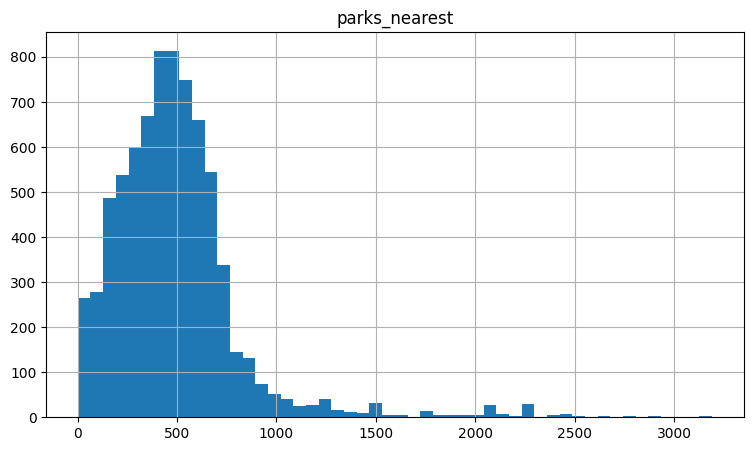

In [64]:
plt.figure(figsize=(9,5))
plt.title('parks_nearest')
data['parks_nearest'].hist(bins=50);

Не считая нулевых данных о расстоянии до ближайшего парка, в основном парки располагаются не дальше одного километра.

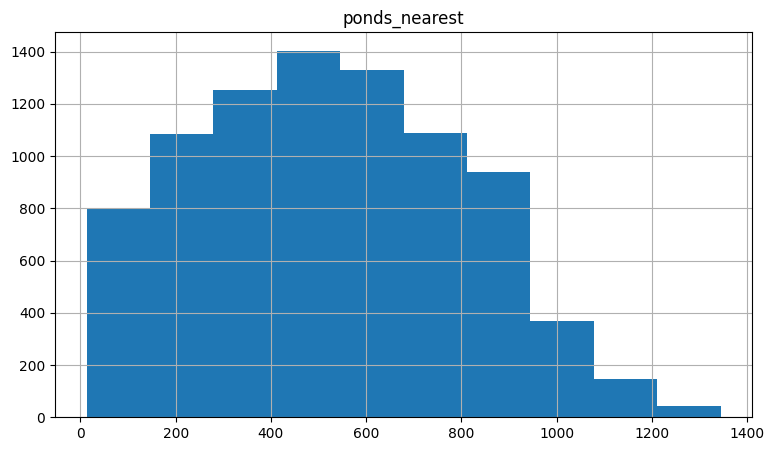

In [65]:
plt.figure(figsize=(9,5))
plt.title('ponds_nearest')
data['ponds_nearest'].hist(bins=10);

Не считая нулевых данных о расстоянии до ближайшего водоема, данные распределены равномерно.

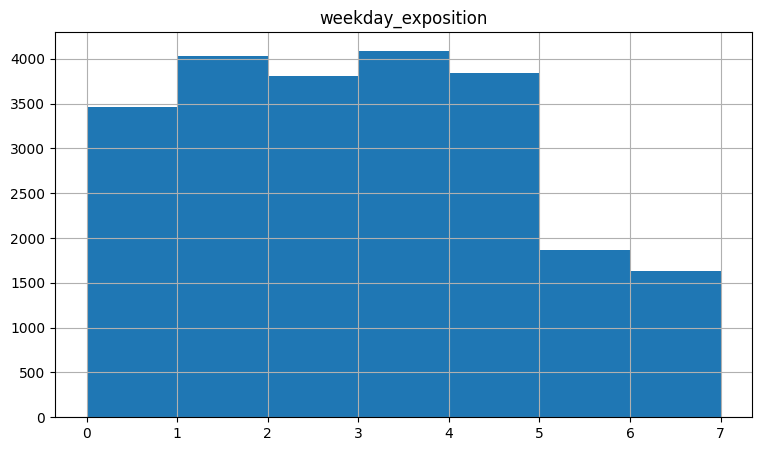

In [66]:
plt.figure(figsize=(9,5))
plt.title('weekday_exposition')
data['weekday_exposition'].hist(bins=7, range=(0,7));

Меньше всего объявлений опубликовали в выходные дни, так же есть незначительные пики во вторник и четверг.

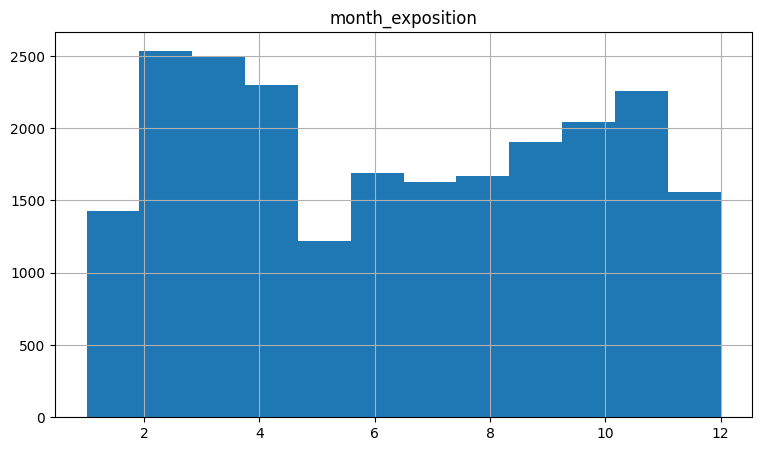

In [67]:
plt.figure(figsize=(9,5))
plt.title('month_exposition')
data['month_exposition'].hist(bins=12);

Больше всего объявлений опубликовано в период с февраля по апрель, а так же в ноябре. Меньше всего - в мае.

**Вывод:**
Построение гистограмм важных для исследования параметров объектов показывает, с какими данными предстоит работа.

#### Изучение продаж квартир

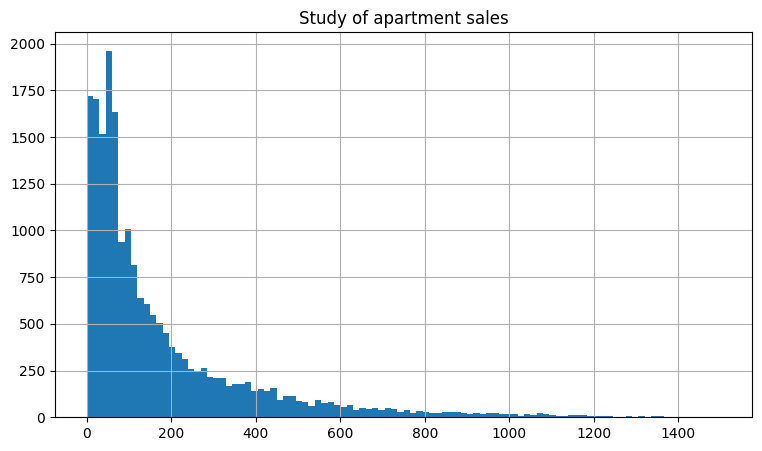

In [68]:
plt.figure(figsize=(9,5))
plt.title('Study of apartment sales')
data['days_exposition'].hist(bins=100, range=(0,1500));

In [69]:
data['days_exposition'].describe()

count    19774.000000
mean       178.389451
std        216.894315
min          1.000000
25%         45.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Вывод:**
Необычно долгими продажами можно считать, которые были проданы более 228 дней, после публикации объявления.

Быстрыми будут продажи те, объекты которые были проданы до 45 дней размещения публикации.

#### Влияние факторов на цену

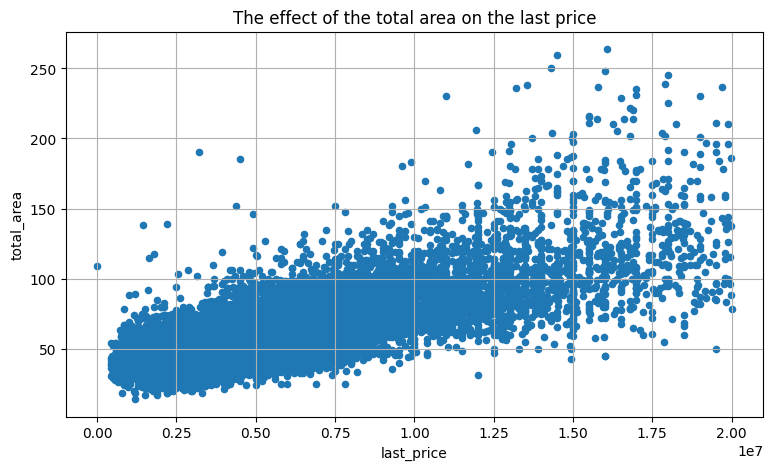

In [70]:
data.plot(x='last_price', y='total_area', kind='scatter', grid=True, figsize=(9,5))
plt.title('The effect of the total area on the last price');

In [71]:
data['last_price'].corr(data['total_area'])

0.7724888597144673

Довольно высокая положительная корреляция. Чем больше общей площади квартиры, тем она дороже, очень логично.

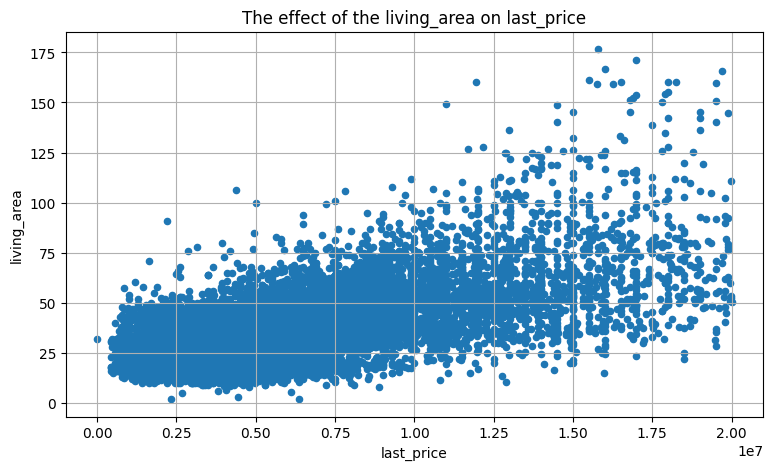

In [72]:
data.plot(x='last_price', y='living_area', kind='scatter', grid=True, figsize=(9,5))
plt.title('The effect of the living_area on last_price');

In [73]:
data['last_price'].corr(data['living_area'])

0.6690293067222138

Немного поменьше, но все равно высокая положительная корреляция. Больше площадь - выше стоимость.

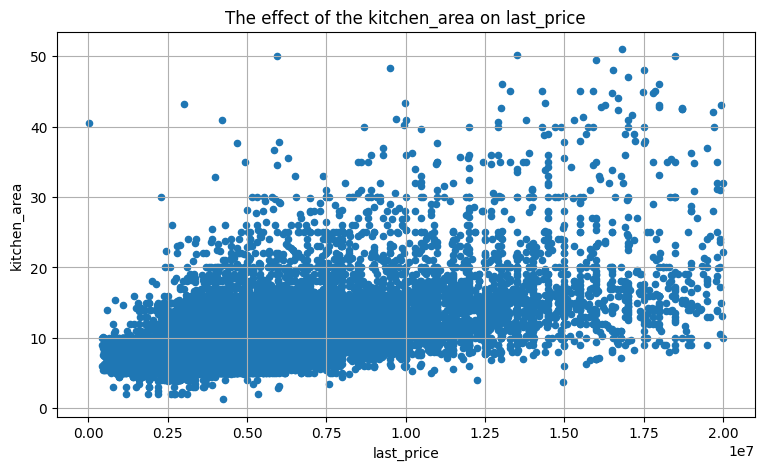

In [74]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', grid=True, figsize=(9,5))
plt.title('The effect of the kitchen_area on last_price');

In [75]:
data['last_price'].corr(data['kitchen_area'])

0.5815826899824803

А вот в случае с увеличением площади кухни, цены растут не так стремительно.

In [76]:
rooms_price_mean = data.pivot_table(index='rooms', values='last_price', aggfunc='mean')

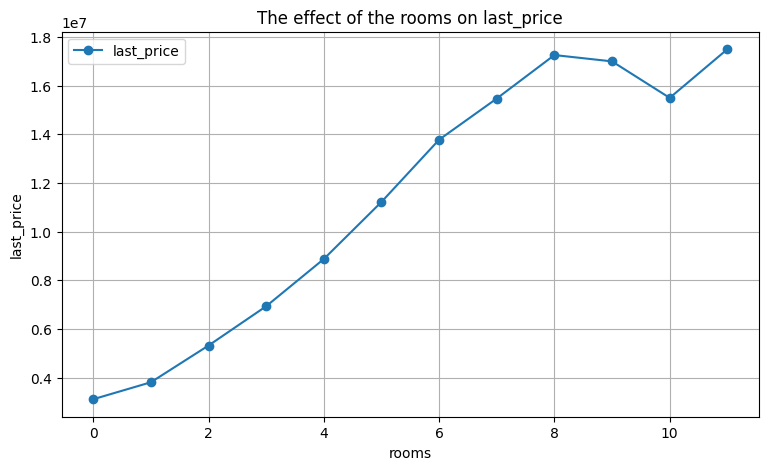

In [77]:
rooms_price_mean.plot(style='o-', grid=True, figsize=(9,5))
plt.ylabel('last_price')
plt.title('The effect of the rooms on last_price');

In [78]:
data['rooms'].corr(data['last_price'])

0.5080663776915204

Хоть на графике и кажется, что есть огромная положительная корреляция между количеством комнат и ценой объекта, на деле этот фактор не повышает цену чересчур сильно.

In [79]:
type_floor_price_mean = data.pivot_table(index='floor_type', values='last_price', aggfunc='mean')

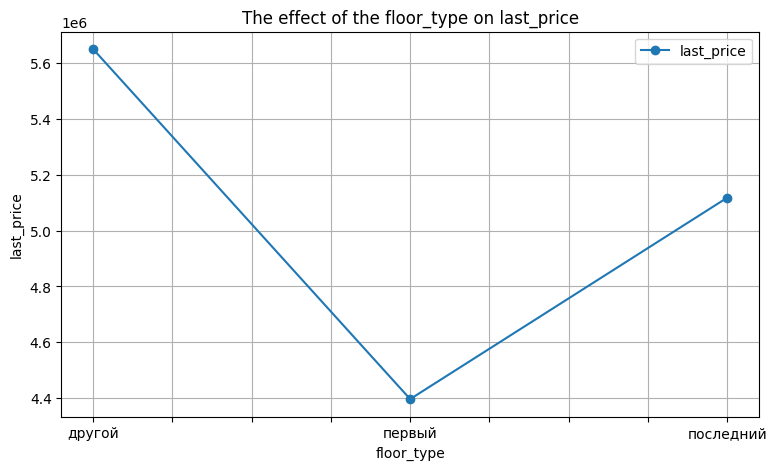

In [80]:
type_floor_price_mean.plot(style='o-', grid=True, figsize=(9,5))
plt.ylabel('last_price')
plt.title('The effect of the floor_type on last_price');

Первый этаж – самый дешевый, а этажи между, как правило, самые популярные.

In [81]:
weekday_price_mean = data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='mean')

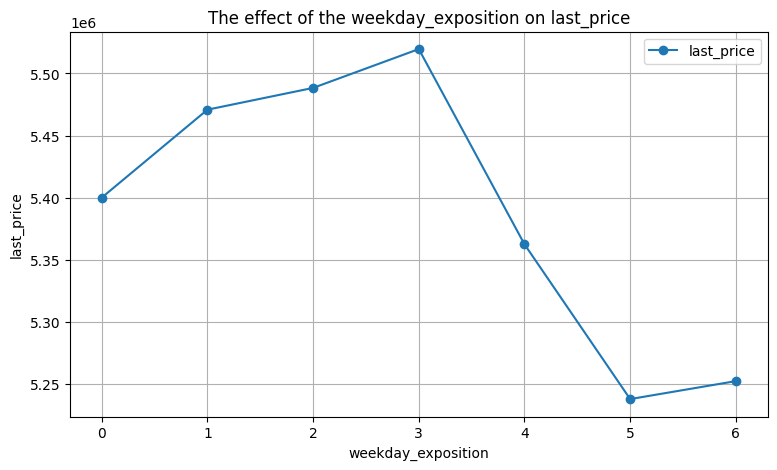

In [82]:
weekday_price_mean.plot(style='o-', grid=True, figsize=(9,5))
plt.ylabel('last_price')
plt.title('The effect of the weekday_exposition on last_price');

In [83]:
data['weekday_exposition'].corr(data['last_price'])

-0.01695763467660864

Почти нулевая корреляция говорит о том, что день недели публикации объявления никак не влияет на цену объекта.

In [84]:
month_price_mean = data.pivot_table(index='month_exposition', values='last_price', aggfunc='mean')

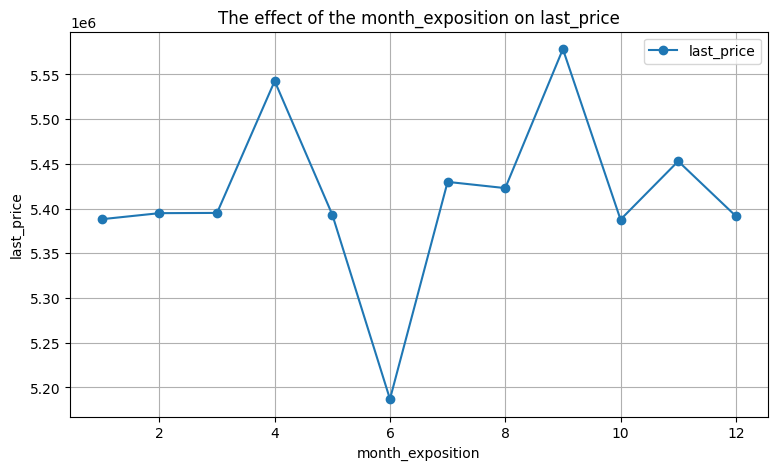

In [85]:
month_price_mean.plot(style='o-', grid=True, figsize=(9,5))
plt.ylabel('last_price')
plt.title('The effect of the month_exposition on last_price');

In [86]:
data['month_exposition'].corr(data['last_price'])

0.003648931362871927

Так же и месяц не влияет на цену.

In [87]:
year_price_mean = data.pivot_table(index='year_exposition', values='last_price', aggfunc='mean')

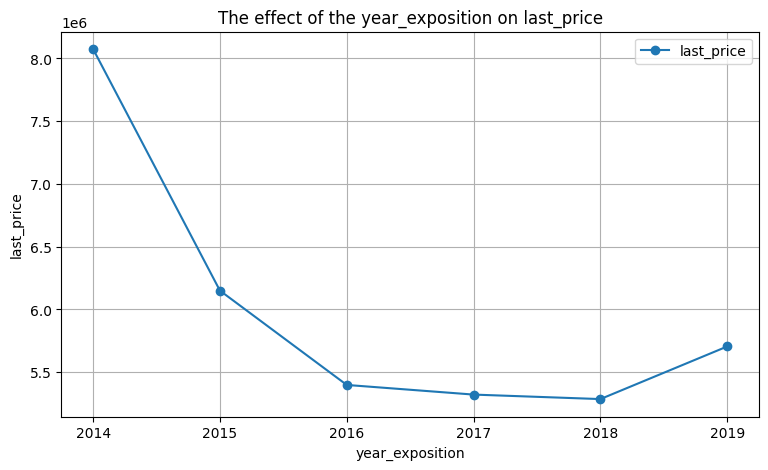

In [88]:
year_price_mean.plot(style='o-', grid=True, figsize=(9,5))
plt.ylabel('last_price')
plt.title('The effect of the year_exposition on last_price');

In [89]:
data['year_exposition'].corr(data['last_price'])

-0.026800623496023645

И смотря в каком году опубликовано объявление, на цену объектов серьезно не меняет.

**Вывод:**
Исходя из коррелирующих графиков влияния на стоимость объекта можно выделить то, что высокой корреляцией является зависимость цены от общей площади объекта (коэффициент корреляции равен 0.77).


#### Средняя цена за квадратный метр

In [90]:
mean_price_sqare_meter = data.pivot_table(index='locality_name', values='price_one_sqare_meter', aggfunc=['count', 'mean'])

In [91]:
mean_price_sqare_meter.columns=['count_publications', 'mean_price']

In [92]:
mean_price_sqare_meter = mean_price_sqare_meter.sort_values('count_publications', ascending=False)

In [93]:
mean_price_sqare_meter_ten = mean_price_sqare_meter.head(10)

In [94]:
mean_price_sqare_meter_ten

,count_publications,mean_price
locality_name,,
Санкт-Петербург,14866,108516.210499
Мурино,554,85625.036585
Кудрово,455,95265.291518
Шушары,440,78677.364217
Всеволожск,395,67238.016024
Пушкин,357,101755.202850
Колпино,336,75316.747183
Парголово,326,90332.263023
Гатчина,307,68746.146763


In [95]:
mean_price_sqare_meter_ten[mean_price_sqare_meter_ten['mean_price'] == mean_price_sqare_meter_ten['mean_price'].min()]

,count_publications,mean_price
locality_name,,
Выборг,237,58141.909153


In [96]:
mean_price_sqare_meter_ten[mean_price_sqare_meter_ten['mean_price'] == mean_price_sqare_meter_ten['mean_price'].max()]

,count_publications,mean_price
locality_name,,
Санкт-Петербург,14866,108516.210499


**Вывод:**
Вычисление средней цены за квадратный метр поможет лучше определить, в каком населенном пункте находиться объект.

Самая высокая цена за квадратный метр в Санкт-Петербурге, в среднем это 108 516 рубля. Самым дешевым квадратным метром среди 10 населенных пунктов может похвастаться Выборг - 58 142 рубля.

#### Зависимость стоимости от расстояния до центра города.

In [97]:
saint_petersburg = data.query('locality_name == "Санкт-Петербург"')
saint_petersburg_mean = saint_petersburg.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean')
saint_petersburg_mean

,last_price
cityCenters_nearest_km,
0.0,1.019857e+07
1.0,1.055320e+07
2.0,9.967032e+06
3.0,9.061342e+06
4.0,9.340947e+06
5.0,9.369935e+06
6.0,8.583335e+06
7.0,7.919904e+06
8.0,7.855050e+06


<AxesSubplot:xlabel='cityCenters_nearest_km'>

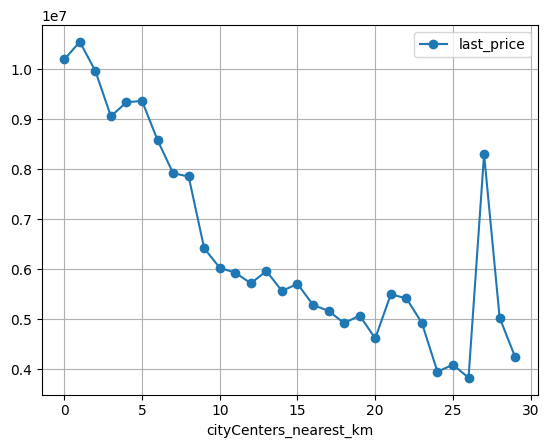

In [98]:
saint_petersburg_mean.plot(style='o-', grid=True)

**Вывод:**

В основном данная зависимость - отрицательная корреляция. Чем дальше объект от центра города, тем он дороже, что в принципе логично. Но так же есть настораживающий выброс на 27 километре от центра города. Возможно, там тоже есть что-то, что может повысить стоимость.

### Общий вывод

Было проведено исследование, по изучению разных параметров объектов недвижимости. Результаты исследования помогут при построении автоматизированной системы определения рыночной стоимости объектов недвижимости и отследит аномалии и мошенническую деятельность.

Перед проведением исследования были поставлены следующие гипотезы:
- Гипотеза 1: Как быстро продавались квартиры;
- Гипотеза 2: Какие факторы больше всего влияют на общую стоимость объекта;
- Гипотеза 3: Какая средняя цена одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений;
- Гипотеза 4: Как стоимость объектов зависит от расстояния до центра города.

**Гипотеза 1 подтверждена:**
Необычно долгими продажами можно считать, которые были проданы более 228 дней, после публикации объявления. Быстрыми будут продажи те, объекты которые были проданы до 45 дней размещения публикации.

**Гипотеза 2 подтверждена:**
Больше всего на стоимость объекта влияет фактор общей площади объекта (коэффициент корреляции 0,77).

**Гипотеза 3 подтверждена:**
Самой дорогой среди 10 населенных пунктов с наибольшим числом объявлений средняя цена одного квадратного метра в Санкт-Петербурге (108573.5 рублей), самым дешевым квадратным метром среди 10 населенных пунктов может похвастаться Выборг (58142 рубля).

**Гипотеза 4 частично подтверждена:** *для более точных выводов необходимо больше данных о факторах, повышающих цену в округе.

Стоимость объектов отрицательно коррелирует с расстоянием до центра города, чем дальше объект от центра города, тем он дороже. Присутствует выброс на 27 километре от центра города. Но предоставленных данных не хватает, чтобы узнать с чем это связано.

**Рекомендации перед построением автоматизированной системы определения рыночной стоимости объектов недвижимости:**
1. За основу в построении системы можно использовать зависимости на основе 1-3 гипотезы.
2. Для проверки по четвертой гипотезе необходимо собрать больше данных.